# Get two layer model parameters for Kyle

I'm sure I did this somewhere else but it's 11 March and I'm tired

Theme Song: You And Me And Everything In Between<br>
Artist: Maybeshewill<br>
Album: Fair Youth<br>
Released: 2014

In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open('../data_input/tunings/cmip6_twolayer_tuning_params.json') as file:
    geoff = json.load(file)

In [3]:
geoff.keys()

dict_keys(['q4x', 'lamg', 't4x', 'cdeep', 'cmix', 'gamma_2l', 'eff'])

In [4]:
data_dict = {}
for key in geoff.keys():
    data_dict[key] = geoff[key]['model_data']['EBM-epsilon']

df = pd.DataFrame(data_dict)

In [5]:
df['kappa'] = df['eff'] * df['gamma_2l']

In [6]:
def _calculate_geoffroy_helper_parameters(
    cmix, cdeep, lambda0, efficacy, eta
):

    b_pt1 = (lambda0 + efficacy * eta) / cmix
    b_pt2 = eta / cdeep
    b = b_pt1 + b_pt2
    b_star = b_pt1 - b_pt2
    delta = b ** 2 - (4 * lambda0 * eta) / (cmix * cdeep)

    taucoeff = cmix * cdeep / (2 * lambda0 * eta)
    d1 = taucoeff * (b - delta ** 0.5)
    d2 = taucoeff * (b + delta ** 0.5)

    phicoeff = cmix / (2 * efficacy * eta)
    phi1 = phicoeff * (b_star - delta ** 0.5)
    phi2 = phicoeff * (b_star + delta ** 0.5)

    adenom = cmix * (phi2 - phi1)
    a1 = d1 * phi2 * lambda0 / adenom
    a2 = -d2 * phi1 * lambda0 / adenom

    qdenom = cmix * (phi2 - phi1)
    q1 = d1 * phi2 / qdenom
    q2 = -d2 * phi1 / qdenom

    out = {
        "d1": d1,
        "d2": d2,
        "q1": q1,
        "q2": q2,
        "efficacy": efficacy,
        "a1": a1,
        "a2": a2
    }
    return out

In [7]:
output = []
for i, row in df.iterrows():
    gh = _calculate_geoffroy_helper_parameters(df.loc[i,'cmix'], df.loc[i,'cdeep'], -df.loc[i,'lamg'], df.loc[i,'eff'], df.loc[i,'gamma_2l'])
    output.append([gh['d1'], gh['d2'], gh['a1'], gh['a2']])
df_a = pd.DataFrame(output, columns=['tau1', 'tau2', 'a1', 'a2'], index=df.index)
df_a

,tau1,tau2,a1,a2
CESM2-WACCM-FV2,4.825727,447.453762,0.348356,0.651644
E3SM-1-0,7.045866,228.662684,0.513301,0.486699
NorESM2-LM,1.615169,662.798102,0.265197,0.734803
CESM2-WACCM,4.573834,329.030390,0.380630,0.619370
GISS-E2-2-G,4.469298,941.244056,0.824545,0.175455
FGOALS-g3,3.717405,261.255178,0.580829,0.419171
CESM2,4.448580,325.993257,0.339413,0.660587
CESM2-FV2,3.950483,421.236790,0.303194,0.696806
AWI-CM-1-1-MR,4.264331,189.099361,0.620322,0.379678
CNRM-ESM2-1,6.215387,304.339879,0.517561,0.482439


In [8]:
df

,q4x,lamg,t4x,cdeep,cmix,gamma_2l,eff,kappa
CESM2-WACCM-FV2,7.011729,-0.601681,11.653568,112.097270,8.170171,0.704935,1.501194,1.058244
E3SM-1-0,7.396112,-0.629308,11.752765,43.903583,8.393029,0.363434,1.455885,0.529118
NorESM2-LM,9.532072,-0.926445,10.288864,145.052415,5.604629,0.819696,3.074719,2.520335
CESM2-WACCM,7.856972,-0.705814,11.131791,89.669971,8.293804,0.700155,1.525304,1.067949
GISS-E2-2-G,7.192669,-1.642447,4.379239,411.847639,8.893610,0.530129,0.651705,0.345488
FGOALS-g3,7.972359,-1.283779,6.210069,98.486896,8.132896,0.642434,1.373041,0.882088
CESM2,8.478362,-0.658886,12.867720,75.909823,8.412395,0.668309,1.771465,1.183886
CESM2-FV2,7.707721,-0.581514,13.254569,92.727103,7.417003,0.710720,1.768261,1.256737
AWI-CM-1-1-MR,8.168461,-1.209335,6.754507,56.493956,8.200244,0.475052,1.448388,0.688059
CNRM-ESM2-1,5.797400,-0.633740,9.147916,97.019791,7.468409,0.604436,0.903109,0.545871


In [9]:
df = pd.concat([df, df_a], axis=1)

In [10]:
mean = df.mean()
mean.name = 'Mean'
df = df.append(mean)

In [11]:
std = df.std()
std.name = 'StDev'
df = df.append(std)

In [12]:
df.to_csv('../data_output/cmip6_twolayer_tuning_params.csv')

In [13]:
df

,q4x,lamg,t4x,cdeep,cmix,gamma_2l,eff,kappa,tau1,tau2,a1,a2
CESM2-WACCM-FV2,7.011729,-0.601681,11.653568,112.097270,8.170171,0.704935,1.501194,1.058244,4.825727,447.453762,0.348356,0.651644
E3SM-1-0,7.396112,-0.629308,11.752765,43.903583,8.393029,0.363434,1.455885,0.529118,7.045866,228.662684,0.513301,0.486699
NorESM2-LM,9.532072,-0.926445,10.288864,145.052415,5.604629,0.819696,3.074719,2.520335,1.615169,662.798102,0.265197,0.734803
CESM2-WACCM,7.856972,-0.705814,11.131791,89.669971,8.293804,0.700155,1.525304,1.067949,4.573834,329.030390,0.380630,0.619370
GISS-E2-2-G,7.192669,-1.642447,4.379239,411.847639,8.893610,0.530129,0.651705,0.345488,4.469298,941.244056,0.824545,0.175455
FGOALS-g3,7.972359,-1.283779,6.210069,98.486896,8.132896,0.642434,1.373041,0.882088,3.717405,261.255178,0.580829,0.419171
CESM2,8.478362,-0.658886,12.867720,75.909823,8.412395,0.668309,1.771465,1.183886,4.448580,325.993257,0.339413,0.660587
CESM2-FV2,7.707721,-0.581514,13.254569,92.727103,7.417003,0.710720,1.768261,1.256737,3.950483,421.236790,0.303194,0.696806
AWI-CM-1-1-MR,8.168461,-1.209335,6.754507,56.493956,8.200244,0.475052,1.448388,0.688059,4.264331,189.099361,0.620322,0.379678
CNRM-ESM2-1,5.797400,-0.633740,9.147916,97.019791,7.468409,0.604436,0.903109,0.545871,6.215387,304.339879,0.517561,0.482439


# 7.SM.2.2 check

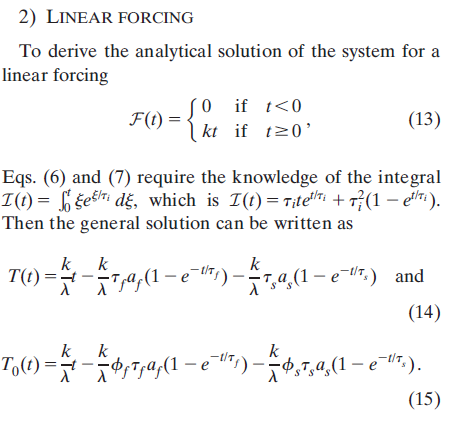


In [26]:
def geoff_eq14(f2x, lam, t, tau_f, a_f, tau_s, a_s):
    #return -f2x/lam + f2x / t / lam * tau_f * a_f * (1 - np.exp(-t/tau_f)) + f2x / t / lam * tau_s * a_s * (1 - np.exp(-t/tau_s))
    ecs = -f2x/lam
    
    return ecs * (1 - 1/t * (tau_f * a_f * (1 - np.exp(-t/tau_f)) + tau_s * a_s * (1 - np.exp(-t/tau_s))))

In [27]:
# TCR for F2x = 3.9 and CMIP6 mean tunings
geoff_eq14(f2x=3.9, lam=-1.06, t=70, tau_f=4.6, a_f=0.54, tau_s=333, a_s=0.46)

2.022281261780983